(1) label: horses | Distance: 0.21
(2) label: horses | Distance: 0.21
(3) label: horses | Distance: 0.22
(4) label: horses | Distance: 0.23
(5) label: horses | Distance: 0.25
(6) label: flowers | Distance: 0.25
(7) label: elephants | Distance: 0.26
(8) label: elephants | Distance: 0.26
(9) label: foods | Distance: 0.27
(10) label: flowers | Distance: 0.27



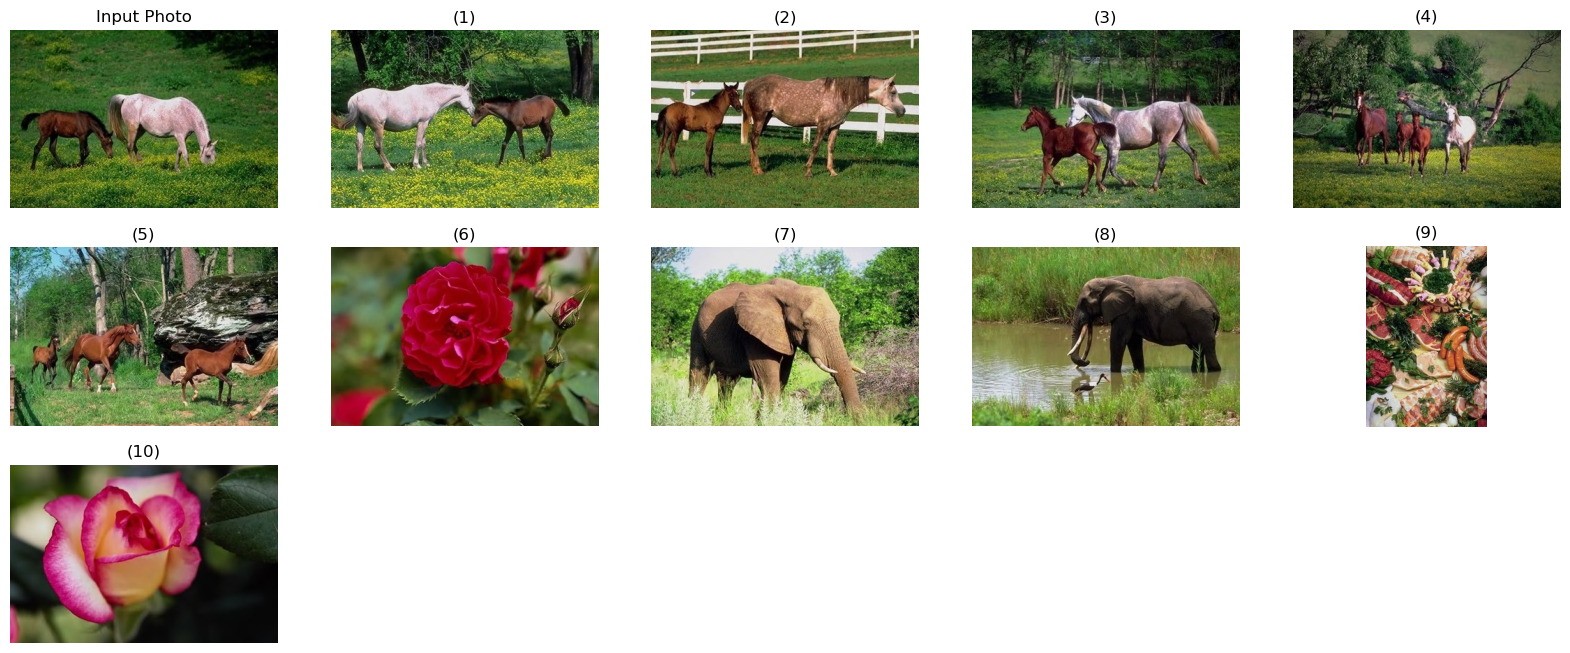

how many photos of those ten are in the same group as the input photo:
Accuracy: 50.0%


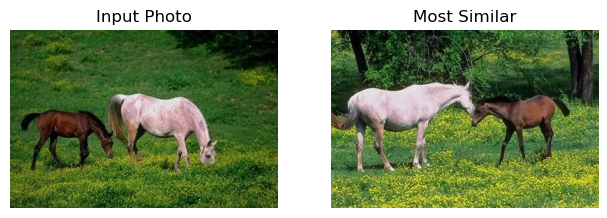

Similarity Score: 0.83


In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def calculate_histogram(image, color_space='hsv'):
    if color_space == 'rgb':
        hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    elif color_space == 'hsv':
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    else:
        raise ValueError("Invalid color space. Choose 'rgb' or 'hsv'.")

    hist = hist.flatten()
    hist /= hist.sum()
    return hist

def compare_histograms(hist1, hist2):
    return distance.euclidean(hist1, hist2)

def display_images(input_photo, similar_photos, titles, rows=3, cols=5):

    plt.figure(figsize=(20,8))
    
    # Display input photo
    plt.subplot(rows, cols, 1)
    plt.imshow(cv2.cvtColor(input_photo, cv2.COLOR_BGR2RGB))
    plt.title("Input Photo")
    plt.axis("off")

    # Display similar photos
    for i, (photo, title) in enumerate(zip(similar_photos, titles), start=1):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")

    plt.show()
    
def calculate_similarity_score(input_hist, most_similar_hist):
    return 1 / (1 + compare_histograms(input_hist, most_similar_hist))

def main(input_photo_path, dataset_path, color_space='hsv'):
    
    # Read the input photo
    input_photo = cv2.imread(input_photo_path)
    input_hist = calculate_histogram(input_photo, color_space)

    distances = []

    # Loop through the dataset
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
        
                if os.path.isfile(file_path):
                    # Read each photo in the dataset
                    photo = cv2.imread(file_path)
                    photo_hist = calculate_histogram(photo, color_space)

                    # Calculate Euclidean distance
                    dist = compare_histograms(input_hist, photo_hist)

                    # Store distance and label in a tuple
                    distances.append((dist, folder, photo))

    # Sort distances based on the first element of the tuple (distance)
    distances.sort(key=lambda x: x[0])

    # Display the first 10 photos with the smallest distances
    top_10_photos = distances[:10]
    top_10_titles = [f"({i+1})" for i, (dist, label, _) in enumerate(top_10_photos)]
    
    # Print the information for the top 10 photos
    top_10_info = [f"({i+1}) label: {label} | Distance: {dist:.2f}\n" for i, (dist, label, _) in enumerate(top_10_photos)]
    print(''.join(top_10_info))

    # Display input photo, similar photos, and their histograms
    display_images(input_photo, [photo for _, _, photo in top_10_photos], top_10_titles)

    # Count how many photos of those ten are in the same group as the input photo
    correct_count = sum(1 for _, label, _ in top_10_photos if label == distances[0][1])

    # Calculate accuracy percentage
    accuracy_percentage = (correct_count / 10) * 100

    print(f"how many photos of those ten are in the same group as the input photo:\n\033[1mAccuracy: {accuracy_percentage}%")
    
    # The most similar photo is the one with the smallest distance
    most_similar_photo = distances[0][2]
    most_similar_hist = calculate_histogram(most_similar_photo, color_space)

    # Calculate similarity score
    similarity_score = calculate_similarity_score(input_hist, most_similar_hist)

    # Display input photo, most similar photo, and their histograms
    display_images(input_photo, [most_similar_photo], [f"Most Similar"])

    print(f"\033[1mSimilarity Score: {similarity_score:.2f}")

if __name__ == "__main__":
    
    input_photo_path = 'Documents/corel_dataset/training_set/horses/799.jpg'
    dataset_path = "Documents/corel_dataset/test_set"

    # Choose color space: 'rgb' or 'hsv'
    color_space = 'hsv'

    main(input_photo_path, dataset_path, color_space)

(1) Distance: 0.11
(2) Distance: 0.12
(3) Distance: 0.13
(4) Distance: 0.13
(5) Distance: 0.13
(6) Distance: 0.14
(7) Distance: 0.15
(8) Distance: 0.15
(9) Distance: 0.15
(10) Distance: 0.16



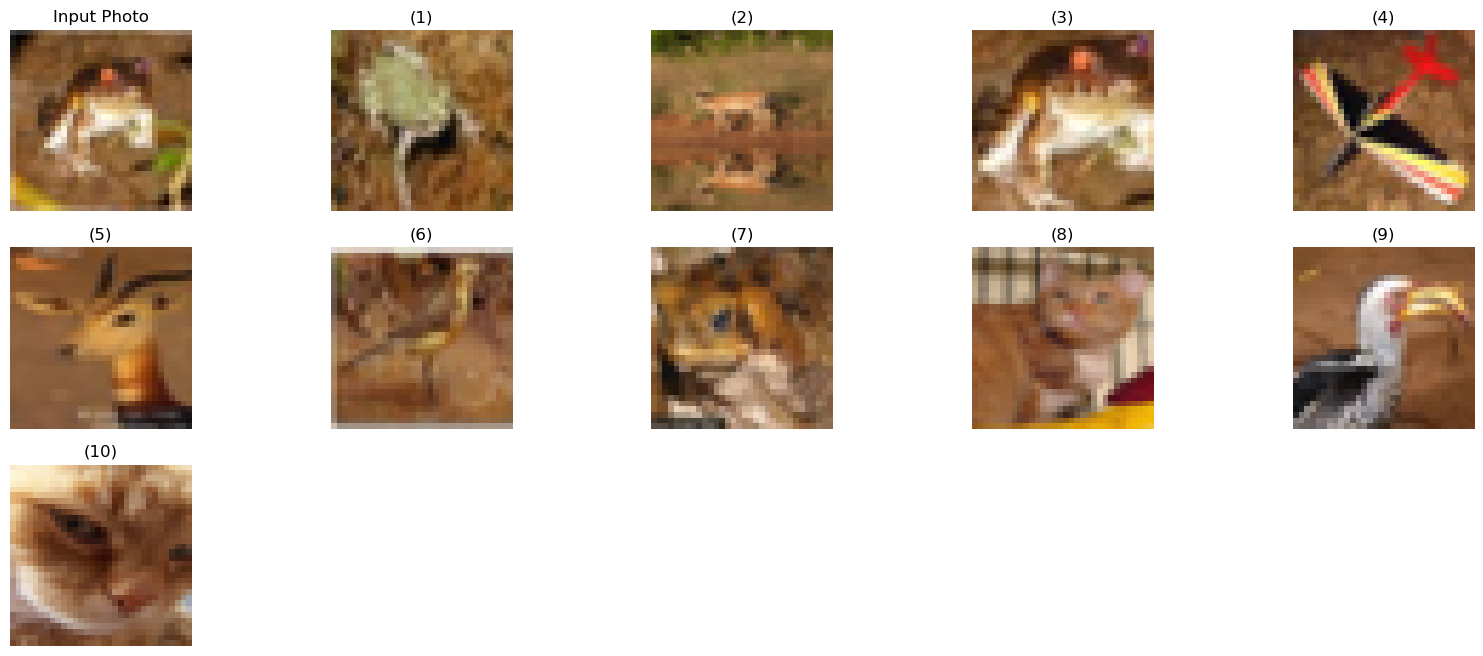

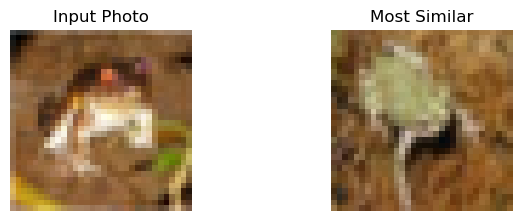

Similarity Score: 0.90


In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import get_file

def calculate_histogram(image, color_space='rgb'):
    if color_space == 'rgb':
        hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    elif color_space == 'hsv':
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    else:
        raise ValueError("Invalid color space. Choose 'rgb' or 'hsv'.")

    hist = hist.flatten()
    hist /= hist.sum()
    return hist

def compare_histograms(hist1, hist2):
    return distance.euclidean(hist1, hist2)

def display_images(input_photo, similar_photos, titles, rows=3, cols=5):

    plt.figure(figsize=(20,8))
    
    # Display input photo
    plt.subplot(rows, cols, 1)
    plt.imshow(input_photo)
    plt.title("Input Photo")
    plt.axis("off")

    # Display similar photos
    for i, (photo, title) in enumerate(zip(similar_photos, titles), start=1):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(photo)
        plt.title(title)
        plt.axis("off")

    plt.show()

def calculate_similarity_score(input_hist, most_similar_hist):
    return 1 / (1 + compare_histograms(input_hist, most_similar_hist))

def main(input_photo_path, dataset_path, color_space='rgb'):
    # Load CIFAR-10 dataset
    (x_train, _), (_, _) = cifar10.load_data()

    # Read the input photo
    input_photo = x_train[0]  # Use the first image from the CIFAR-10 dataset
    input_hist = calculate_histogram(input_photo, color_space)

    distances = []

    # Loop through the CIFAR-10 dataset
    for i, photo in enumerate(x_train):
        # Calculate histogram for each photo
        photo_hist = calculate_histogram(photo, color_space)

        # Calculate Euclidean distance
        dist = compare_histograms(input_hist, photo_hist)

        # Store distance and label in a tuple
        distances.append((dist, i, photo))

    # Sort distances based on the first element of the tuple (distance)
    distances.sort(key=lambda x: x[0])

    # Display the first 10 photos with the smallest distances
    top_10_photos = distances[1:11]  # Exclude the input photo
    top_10_titles = [f"({i+1})" for i, (dist, _, _) in enumerate(top_10_photos)]

    # Print the information for the top 10 photos
    top_10_info = [f"({i+1}) Distance: {dist:.2f}\n" for i, (dist, _, _) in enumerate(top_10_photos)]
    print(''.join(top_10_info))

    # Display input photo, similar photos, and their histograms
    display_images(input_photo, [photo for _, _, photo in top_10_photos], top_10_titles)

    # The most similar photo is the one with the smallest distance
    most_similar_photo = distances[1][2]  # Exclude the input photo
    most_similar_hist = calculate_histogram(most_similar_photo, color_space)

    # Calculate similarity score
    similarity_score = calculate_similarity_score(input_hist, most_similar_hist)

    # Display input photo, most similar photo, and their histograms
    display_images(input_photo, [most_similar_photo], [f"Most Similar"])

    print(f"Similarity Score: {similarity_score:.2f}")

if __name__ == "__main__":
    # Specify the local directory to download CIFAR-10
    dataset_path = os.path.expanduser('~/.keras/datasets/')

   # Download CIFAR-10 dataset if not already downloaded
    cifar10_dir = get_file('cifar-10-batches-py', origin='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz', untar=True, cache_subdir=dataset_path)
    # Load CIFAR-10 dataset
    (x_train, _), (_, _) = cifar10.load_data()

    # Take the last image from the training set
    input_photo_path = x_train[-1]
    
    #input_photo_path = 'path_to_your_input_photo.jpg'  # Replace with the path to your input photo
    #dataset_path = "path_to_your_cifar10_dataset"  # Replace with the path to your CIFAR-10 dataset directory

    # Choose color space: 'rgb' or 'hsv'
    color_space = 'rgb'
    
    main(input_photo_path, dataset_path, color_space)